In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, :2]
y = iris.target

In [4]:
kmeans_iris = KMeans(n_clusters = 3)

In [5]:
kmeans_iris.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
centers = kmeans_iris.cluster_centers_
print(centers)

[[6.81276596 3.07446809]
 [5.006      3.428     ]
 [5.77358491 2.69245283]]


Text(0.5, 1.0, 'Predicted')

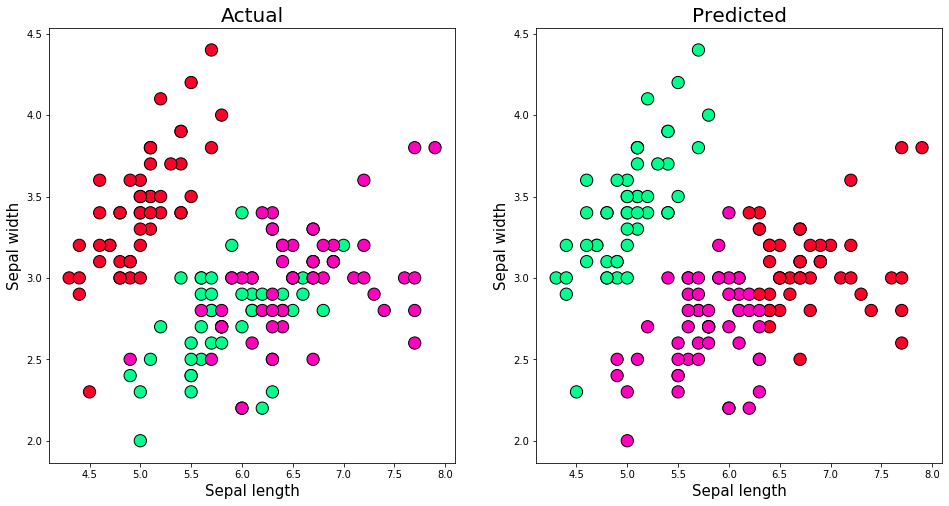

In [7]:
y_kmeans = kmeans_iris.labels_

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize='15')
axes[0].set_ylabel('Sepal width', fontsize='15')
axes[0].set_title('Actual', fontsize='20')

axes[1].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].set_xlabel('Sepal length', fontsize='15')
axes[1].set_ylabel('Sepal width', fontsize='15')
axes[1].set_title('Predicted', fontsize='20')


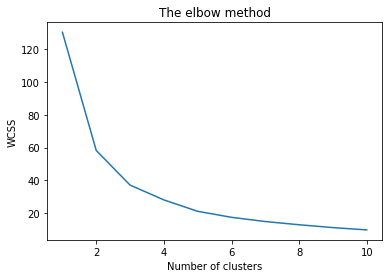

In [8]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Text(0.5, 1.0, 'Predicted')

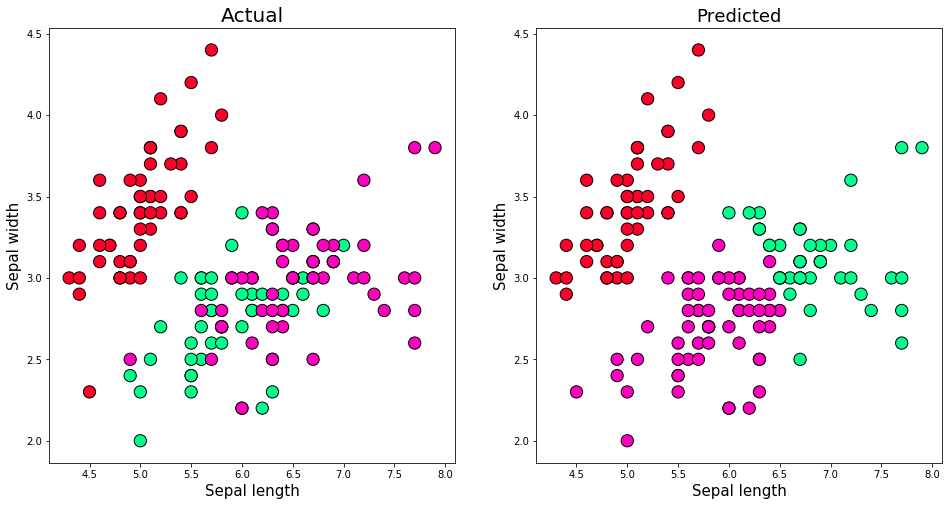

In [9]:
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal as mvn

gmm = GaussianMixture(n_components =3, covariance_type='full')
gmm_iris = gmm.fit(X)
prediction_iris = gmm_iris.predict(X)
probability_iris = gmm_iris.predict_proba(X)

centers = np.zeros((3,2))

for i in range(3):
    density = mvn(cov = gmm_iris.covariances_[i], 
                  mean = gmm_iris.means_[i]).logpdf(X)
    centers[i, :] = X[np.argmax(density)]

y_gmm = prediction_iris

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=15)
axes[0].set_ylabel('Sepal width', fontsize=15)
axes[0].set_title('Actual', fontsize=20)

axes[1].scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].set_xlabel('Sepal length', fontsize=15)
axes[1].set_ylabel('Sepal width', fontsize=15)
axes[1].set_title('Predicted', fontsize=18)

In [10]:
from sklearn import metrics
iris_kmeans_accuracy = metrics.adjusted_rand_score(y,y_kmeans)
iris_gmm_accuracy = metrics.adjusted_rand_score(y,y_gmm)
print('iris_kmeans_accuray: ', iris_kmeans_accuracy)
print('iris_gmm_accuracy: ', iris_gmm_accuracy)

iris_kmeans_accuray:  0.6006861021484542
iris_gmm_accuracy:  0.5473439141421311


In [11]:
from matplotlib.patches import Ellipse
from sklearn import mixture
import seaborn as sns

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
KMeans_iris = KMeans(n_clusters=3)
KMeans_label_iris = KMeans_iris.fit_predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

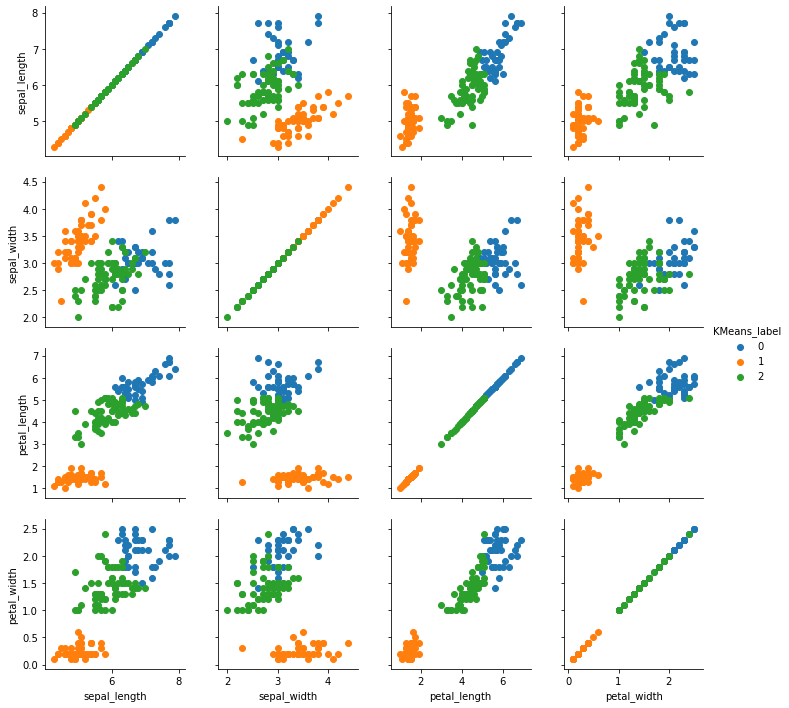

In [19]:
iris['KMeans_label'] = KMeans_label_iris

g = sns.PairGrid(iris, hue="KMeans_label", vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
g.add_legend()
plt.show()


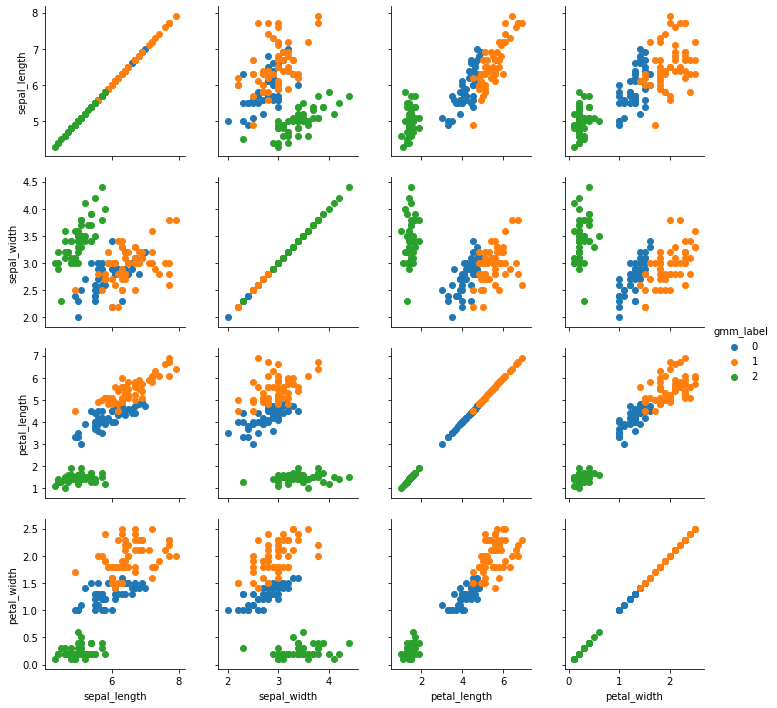

In [20]:
gmm_iris = mixture.GaussianMixture(n_components=3).fit(iris[['sepal_length','sepal_width','petal_length','petal_width']])
gmm_label_iris = gmm_iris.predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

iris['gmm_label']=gmm_label_iris
g = sns.PairGrid(iris, hue="gmm_label", vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
g.add_legend()
plt.show()

In [21]:
iris_kmeans_acc = metrics.adjusted_rand_score(iris['species'],iris['KMeans_label'])
iris_gmm_acc = metrics.adjusted_rand_score(iris['species'],iris['gmm_label'])
print('KMeans_accuray: ', iris_kmeans_acc)
print('gmm_accuracy: ', iris_gmm_acc)

KMeans_accuray:  0.7302382722834697
gmm_accuracy:  0.9038742317748124
